株式市場　その1

In [208]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [210]:
#import pandas_datareader.data as web

In [211]:
from datetime import datetime

In [212]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [213]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [214]:
#for stock in tech_list:
#    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [215]:
import quandl
for stock in tech_list:
    globals()[stock] = quandl.get('WIKI/{}'.format(stock),start_date=start,end_date=end)

In [216]:
type(AAPL)

pandas.core.frame.DataFrame

In [217]:
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000,249.0,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,154.589448,155.562135,153.547241,154.629372,2.686643e+07,0.007349,1.0,154.104585,155.074142,153.064986,154.143819,2.686643e+07
std,13.022584,13.095571,12.816488,12.924141,1.134880e+07,0.066758,0.0,13.461939,13.537359,13.251134,13.362143,1.134880e+07
min,121.150000,121.390000,120.620000,121.350000,1.394898e+07,0.000000,1.0,119.653620,119.890656,119.130167,119.851150,1.394898e+07
25%,143.922500,144.750000,143.190000,143.930000,2.013409e+07,0.000000,1.0,143.051798,143.895950,142.149169,142.952608,2.013409e+07
50%,154.000000,154.718900,153.310000,153.950000,2.361796e+07,0.000000,1.0,153.716304,154.280000,152.700000,153.390000,2.361796e+07
75%,163.800000,164.520000,163.480000,164.000000,3.023451e+07,0.000000,1.0,163.800000,164.520000,163.480000,164.000000,3.023451e+07
max,179.370000,180.100000,178.250000,179.260000,1.119850e+08,0.630000,1.0,179.370000,180.100000,178.250000,179.260000,1.119850e+08


In [218]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2017-01-31 to 2018-01-29
Data columns (total 12 columns):
Open           249 non-null float64
High           249 non-null float64
Low            249 non-null float64
Close          249 non-null float64
Volume         249 non-null float64
Ex-Dividend    249 non-null float64
Split Ratio    249 non-null float64
Adj. Open      249 non-null float64
Adj. High      249 non-null float64
Adj. Low       249 non-null float64
Adj. Close     249 non-null float64
Adj. Volume    249 non-null float64
dtypes: float64(12)
memory usage: 25.3 KB


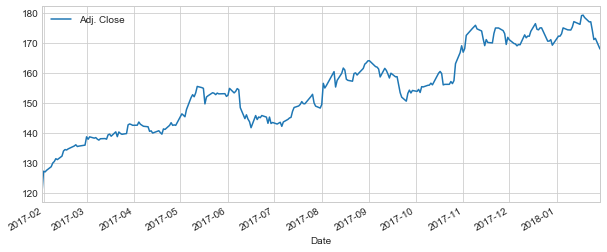

In [219]:
AAPL['Adj. Close'].plot(legend=True,figsize=(10,4))

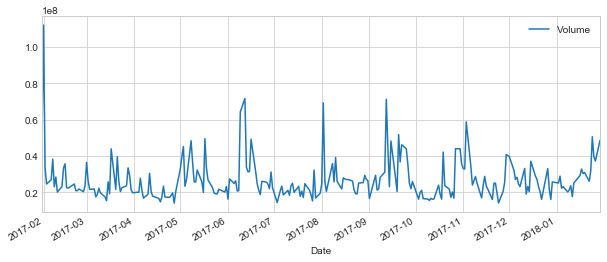

In [220]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

移動平均線

株式市場　その2

In [221]:
#ma_day = [10,20,50]

#for ma in ma_day:
#    column_name = "MA {}".format(str(ma))
#    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

In [222]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name='MA {}'.format(ma)
    AAPL[column_name]=AAPL['Adj. Close'].rolling(window=ma,center=False).mean()

In [223]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50
Date,,,,,,,,,,,,,,,
2017-01-31,121.150,121.39,120.62,121.35,49200993.0,0.0,1.0,119.653620,119.890656,119.130167,119.851150,49200993.0,NaN,NaN,NaN
2017-02-01,127.030,130.49,127.01,128.75,111985040.0,0.0,1.0,125.460994,128.878258,125.441241,127.159749,111985040.0,NaN,NaN,NaN
2017-02-02,127.975,129.39,127.78,128.53,33710411.0,0.0,1.0,126.394322,127.791844,126.201730,126.942467,33710411.0,NaN,NaN,NaN
2017-02-03,128.310,129.19,128.16,129.08,24507301.0,0.0,1.0,126.725184,127.594315,126.577037,127.485673,24507301.0,NaN,NaN,NaN
2017-02-06,129.130,130.50,128.90,130.29,26845924.0,0.0,1.0,127.535056,128.888134,127.307897,128.680728,26845924.0,NaN,NaN,NaN


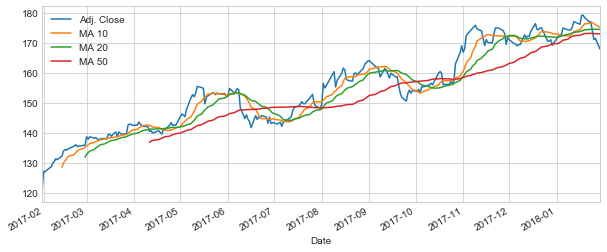

In [224]:
AAPL[['Adj. Close','MA 10','MA 20','MA 50']].plot(subplots=False, figsize=(10,4))

In [225]:
AAPL['Daily Return']=AAPL['Adj. Close'].pct_change()

In [226]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,,,,,,,
2017-01-31,121.150,121.39,120.62,121.35,49200993.0,0.0,1.0,119.653620,119.890656,119.130167,119.851150,49200993.0,NaN,NaN,NaN,NaN
2017-02-01,127.030,130.49,127.01,128.75,111985040.0,0.0,1.0,125.460994,128.878258,125.441241,127.159749,111985040.0,NaN,NaN,NaN,0.060981
2017-02-02,127.975,129.39,127.78,128.53,33710411.0,0.0,1.0,126.394322,127.791844,126.201730,126.942467,33710411.0,NaN,NaN,NaN,-0.001709
2017-02-03,128.310,129.19,128.16,129.08,24507301.0,0.0,1.0,126.725184,127.594315,126.577037,127.485673,24507301.0,NaN,NaN,NaN,0.004279
2017-02-06,129.130,130.50,128.90,130.29,26845924.0,0.0,1.0,127.535056,128.888134,127.307897,128.680728,26845924.0,NaN,NaN,NaN,0.009374


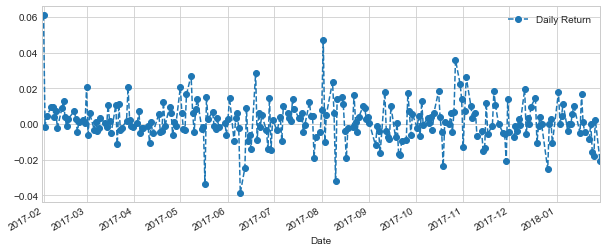

In [227]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

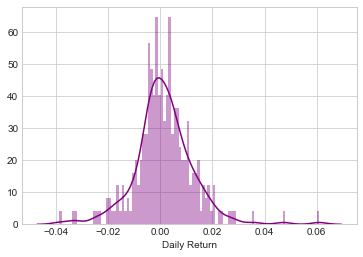

In [228]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

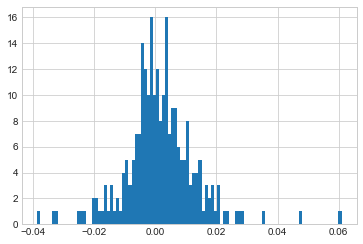

In [229]:
AAPL['Daily Return'].hist(bins=100)

In [230]:
#closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [237]:
AAPL.index

DatetimeIndex(['2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='Date', length=249, freq=None)

In [239]:
closing_df=DataFrame(index=AAPL.index,columns=tech_list)
closing_df=closing_df.fillna(0)
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-01-31,0,0,0,0
2017-02-01,0,0,0,0
2017-02-02,0,0,0,0
2017-02-03,0,0,0,0
2017-02-06,0,0,0,0


In [240]:
for stock in tech_list:
    closing_df[stock] = quandl.get('WIKI/{}.11'.format(stock),start_date=start,end_date=end)

In [241]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-01-31,119.851150,796.790,63.244128,823.48
2017-02-01,127.159749,795.695,62.197396,832.35
2017-02-02,126.942467,798.530,61.796312,839.95
2017-02-03,127.485673,801.490,62.295221,810.20
2017-02-06,128.680728,801.340,62.256091,807.64


In [242]:
tech_rets=closing_df.pct_change()

In [243]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-01-31,NaN,NaN,NaN,NaN
2017-02-01,0.060981,-0.001374,-0.016551,0.010771
2017-02-02,-0.001709,0.003563,-0.006449,0.009131
2017-02-03,0.004279,0.003707,0.008073,-0.035419
2017-02-06,0.009374,-0.000187,-0.000628,-0.003160


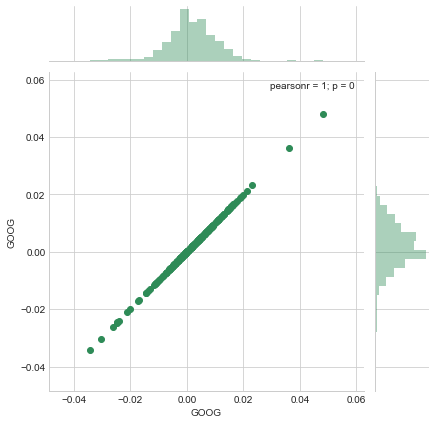

In [244]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

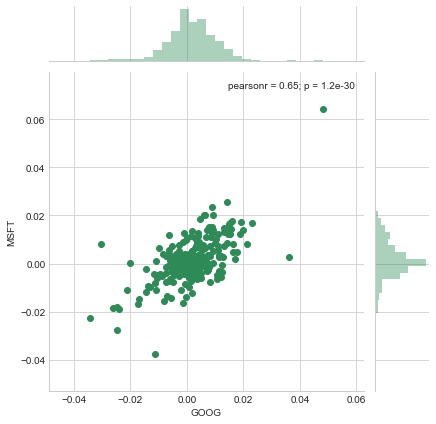

In [245]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='seagreen')

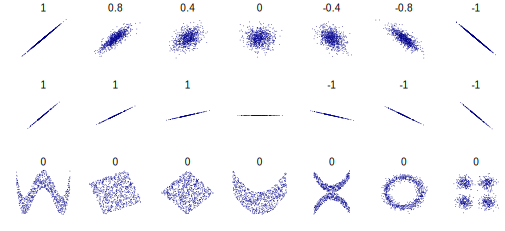

In [246]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

株式市場　その3